In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Case Study: What was the most popular name in Michigan last year?

Start by downloading the baby name data from the Social Security Administration.

* [Direct link to ZIP file](https://www.ssa.gov/oact/babynames/state/namesbystate.zip)
* https://www.ssa.gov/OACT/babynames/index.html
* https://www.ssa.gov/data

Extract it to the current directory. Here's a block of code that does all of that in Python; you don't need to understand how it works.

In [1]:
# Download the ZIP file
import requests
from pathlib import Path

namesbystate_path = Path('namesbystate.zip')
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'

if not namesbystate_path.exists():
    print('Downloading...', end=' ')
    resp = requests.get(data_url)
    with namesbystate_path.open('wb') as f:
        f.write(resp.content)
    print('Done!')
else:
    print("File already downloaded.")

Downloading... Done!


In [4]:
# Extract the data.
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')
zf.extractall(path="names_by_state")
zf.close()

Let's have a look at the Michigan data, it should give us an idea about the structure of the whole thing:

In [5]:
mi_filename = "names_by_state/MI.TXT"
with open(mi_filename) as f:
    for i in range(10):
        print(f.readline().rstrip())

MI,F,1910,Helen,368
MI,F,1910,Mary,349
MI,F,1910,Margaret,272
MI,F,1910,Dorothy,265
MI,F,1910,Ruth,212
MI,F,1910,Florence,164
MI,F,1910,Mildred,159
MI,F,1910,Frances,155
MI,F,1910,Anna,143
MI,F,1910,Marie,143


## Load the data

In [6]:
def load_names(state):
    field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
    return pd.read_csv(f'names_by_state/{state}.TXT', header=None, names=field_names)
mi_names = load_names(state='MI')

In [7]:
mi_names.head()

,State,Sex,Year,Name,Count
0,MI,F,1910,Helen,368
1,MI,F,1910,Mary,349
2,MI,F,1910,Margaret,272
3,MI,F,1910,Dorothy,265
4,MI,F,1910,Ruth,212


In [8]:
mi_names_2018 = mi_names[mi_names.Year == 2018]

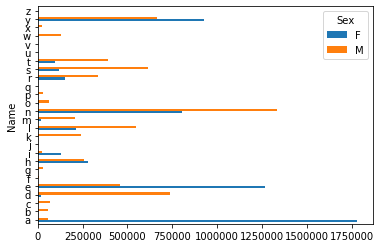

In [21]:
mi_names.groupby([mi_names.Name.str[-1], 'Sex']).Count.sum().unstack(-1).fillna(0.).plot.barh()

## Exploration review

Answer the following questions.

How many rows are in the dataset? How many columns?

In [43]:
# your code here
mi_names.shape

(181882, 5)

*Your answer here*


What is the range of years contained in this dataset?

In [44]:
# your code here
years = mi_names["Year"]
years.describe()

count    181882.00
mean       1975.64
std          29.71
min        1910.00
25%        1954.00
50%        1980.00
75%        2001.00
max        2018.00
Name: Year, dtype: float64

How many different names are there?

In [45]:
# your code here
len(mi_names['Name'].unique())

8886

### Indexing Review

Let's play around a bit with our indexing techniques from earlier today.

**Try the following**:

Extract the first few entries in the Name column, in 3 different ways:

1. Using `mi_names[]`

In [50]:
# Your code here
mi_names['Name'].head()

0       Helen
1        Mary
2    Margaret
3     Dorothy
4        Ruth
Name: Name, dtype: object

2. Using `mi_names.loc[]`

In [51]:
# Your code here
mi_names.loc[:, "Name"].head()

0       Helen
1        Mary
2    Margaret
3     Dorothy
4        Ruth
Name: Name, dtype: object

3. Using `mi_names.iloc[]`

In [53]:
# Your code here
mi_names.iloc[:5, -2]

0       Helen
1        Mary
2    Margaret
3     Dorothy
4        Ruth
Name: Name, dtype: object

### Sorting

What we've done so far is NOT exploratory data analysis. We were just playing around a bit with the capabilities of the pandas library. Now that we're done, let's turn to the problem at hand: Identifying the most common name in Michigan last year.

**Step 1**: Find the most recent year in the DataFrame and extract only the rows for that year.

In [54]:
# your code here
most_recent_year = mi_names["Year"].max()
print("most recent year is", most_recent_year)
mi_names_for_most_recent_year = mi_names[mi_names["Year"] == most_recent_year]

most recent year is 2018


**Step 2**: Get the top-10 names by birth count.

In [55]:
# your code here
mi_names_for_most_recent_year.sort_values('Count', ascending=False).head(10)

,State,Sex,Year,Name,Count
101985,MI,F,2018,Olivia,502
180621,MI,M,2018,Noah,500
101986,MI,F,2018,Ava,493
180622,MI,M,2018,Oliver,486
101987,MI,F,2018,Emma,482
180623,MI,M,2018,Liam,468
101988,MI,F,2018,Charlotte,446
180624,MI,M,2018,Benjamin,442
180625,MI,M,2018,William,419
180626,MI,M,2018,Lucas,417


**Bonus**: break that down by sex. (you may find the `display` built-in function helpful.)

In [56]:
# your code here
for sex in ["M", "F"]:
    by_gender = mi_names_for_most_recent_year[mi_names_for_most_recent_year['Sex'] == sex]
    print("Sex =", sex)
    display(by_gender.sort_values("Count", ascending=False).head(10))

Sex = M


,State,Sex,Year,Name,Count
180621,MI,M,2018,Noah,500
180622,MI,M,2018,Oliver,486
180623,MI,M,2018,Liam,468
180624,MI,M,2018,Benjamin,442
180625,MI,M,2018,William,419
180626,MI,M,2018,Lucas,417
180627,MI,M,2018,Henry,401
180628,MI,M,2018,Elijah,393
180629,MI,M,2018,Logan,383
180630,MI,M,2018,Jackson,376


Sex = F


,State,Sex,Year,Name,Count
101985,MI,F,2018,Olivia,502
101986,MI,F,2018,Ava,493
101987,MI,F,2018,Emma,482
101988,MI,F,2018,Charlotte,446
101989,MI,F,2018,Amelia,403
101990,MI,F,2018,Harper,396
101991,MI,F,2018,Sophia,376
101992,MI,F,2018,Evelyn,355
101993,MI,F,2018,Isabella,344
101994,MI,F,2018,Ella,256


**Bonus**: What is the meaning of this?

In [57]:
(mi_names_for_most_recent_year.Sex == "M").mean()

0.4722846441947566